# Linguistic Networks. Lab 3.

#### Anastasia Romanova

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from networkx.algorithms import bipartite as bp

First of all, we need to make a graph by using a standard graph of networkx "Davis Southern Women".

In [2]:
G = nx.davis_southern_women_graph()

Let's find out ho many nodes it has.

In [3]:
num_nodes = G.number_of_nodes()
print ('The number of nodes: ' + str(num_nodes))

The number of nodes: 32


Alright, it has 32 nodes. But we also want to know whether the graph is bipartite or not.

In [4]:
bp.is_bipartite(G)

True

The function shows that the graph is bipartite, let's look at these two groups we have.

In [5]:
nodes_A, nodes_D = bp.sets(G)
print(nodes_A); print(nodes_D)

{'Sylvia Avondale', 'Helen Lloyd', 'Eleanor Nye', 'Flora Price', 'Nora Fayette', 'Ruth DeSand', 'Theresa Anderson', 'Pearl Oglethorpe', 'Brenda Rogers', 'Frances Anderson', 'Verne Sanderson', 'Charlotte McDowd', 'Katherina Rogers', 'Myra Liddel', 'Laura Mandeville', 'Dorothy Murchison', 'Evelyn Jefferson', 'Olivia Carleton'}
{'E6', 'E5', 'E14', 'E8', 'E12', 'E11', 'E7', 'E13', 'E1', 'E4', 'E10', 'E3', 'E9', 'E2'}


There are two groups: women names and activities they take.
So, we can plot the graph with two colors: red for women and blue for activities(events).

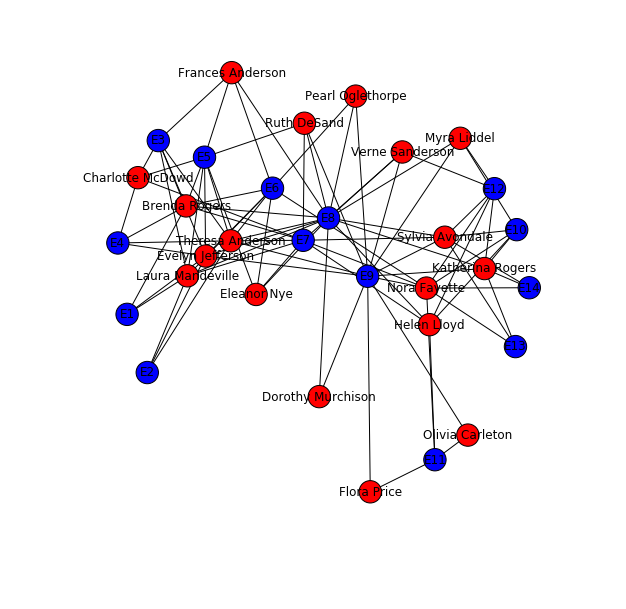

In [6]:
plt.figure(figsize=(8,8))
new_colors = {0:"red", 1:"blue"}
colors=[new_colors[x[1]['bipartite']] for x in G.nodes(data=True)]
nx.draw(G,node_color=colors, with_labels=True, node_size=500)

### Assortativity

Let's compute assortativity coefficient.

Assortativity is a property when nodes with high degree are more often connected with other nodes of high degree, while nodes of low degree are more often connected with other nodes of low degree. Dissortativity is an opoosite propert, it's when the networks nodes of high degree are more often connected to nodes of low degree while nodes of low degree are more often connected to nodes of high degree.

In [7]:
nx.degree_assortativity_coefficient(G)

-0.33699793714355059

The result is under zero, so the graph is dissortative, it means that its nodes of high degree are more often connected to nodes of low degree and vice versa. <br>
Let's find the degrees of graph nodes and plot their distribution.

(array([ 8.,  8.,  2.,  3.,  3.,  5.,  1.,  0.,  1.,  1.]),
 array([  2. ,   3.2,   4.4,   5.6,   6.8,   8. ,   9.2,  10.4,  11.6,
         12.8,  14. ]),
 <a list of 10 Patch objects>)

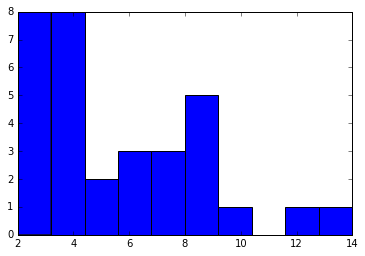

In [8]:
degrees = nx.degree(G)
plt.hist(list(degrees.values()))

The histogram above shows the same results - nodes of high degree are more often connected to nodes of low degree and vice versa.

In [9]:
neigbors = nx.assortativity.average_neighbor_degree(G)

In [10]:
d = [degrees[x] for x in G.nodes()]
n = [neigbors[x] for x in G.nodes()]

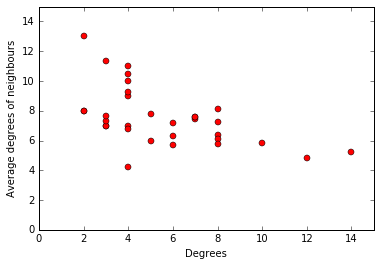

In [11]:
plt.plot([degrees[x] for x in G.nodes()], [neigbors[x] for x in G.nodes()], 'ro')
plt.axis([0,15, 0, 15])
plt.xlabel('Degrees')
plt.ylabel('Average degrees of neighbours')

Same here, the plot shows that the graph is dissortative.

### Adjacency Matrix

Now we can compute adjancy matrix and plot.

In [12]:
A = nx.adjacency_matrix(G)
print(A.todense())

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 1 0 0]
 [0 0 0 ..., 1 0 0]
 ..., 
 [0 1 1 ..., 0 1 0]
 [0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 0 0]]


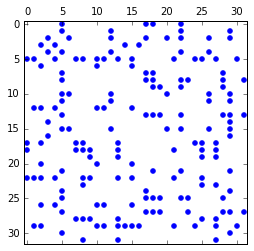

In [13]:
plt.spy(A, precision=0, marker='.', markersize=10)
plt.show()

### Biadjacency Matrix

In [14]:
B = bp.biadjacency_matrix(G,nodes_D,nodes_A)
print(B.todense())

[[0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0]
 [0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 0]
 [1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0]
 [1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0]
 [0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0]
 [1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0]
 [1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0]
 [1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0]]


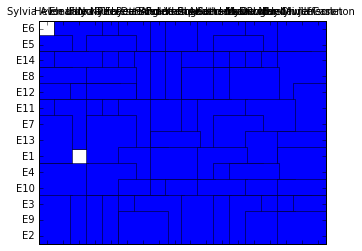

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.spy(B, precision=0, marker='s', markersize=50)
ax.xaxis.set_ticks(range(0, len(nodes_A)))
ax.yaxis.set_ticks(range(0, len(nodes_D)))
ax.xaxis.set_ticklabels(list(nodes_A))
ax.yaxis.set_ticklabels(list(nodes_D))
plt.show()

All the matrices show that it's quite complicated to distinguish blocks and groups.

We are ready for the last step - making projection. Projection is transforming a two-mode network into a one-mode network. The process works by selecting one set of nodes, and linking two nodes if they are connected to the same node of the other set. <br>
The projection of bipartite graph is a very useful thing to compress information about the network. This enables us to conduct a deeper analysis than if the two-mode structure was completely ignored.<br>
We'll make transforming into the one-mode networks without weights. 

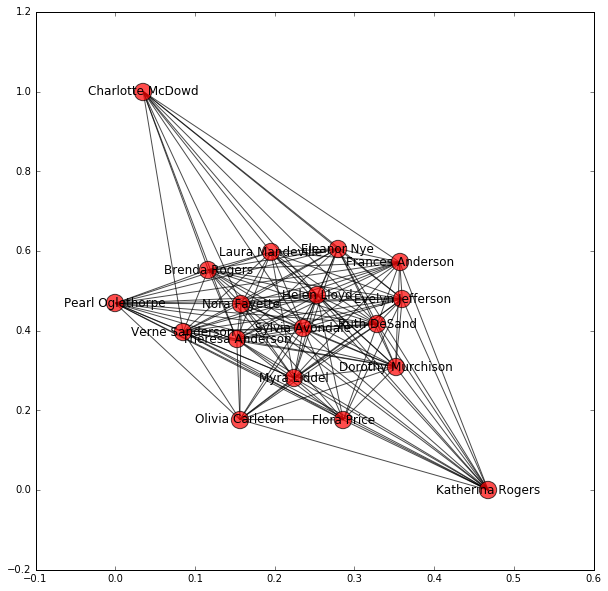

In [16]:
plt.figure(figsize=(10,10))
GA = bp.projected_graph(G, nodes_A) 
nx.draw_networkx(GA,node_color='red',alpha=0.7)

So we can see that the connection among some nodes (number of edges) are stronger than among others. So it means that we can distinguish women who take part in the same events.

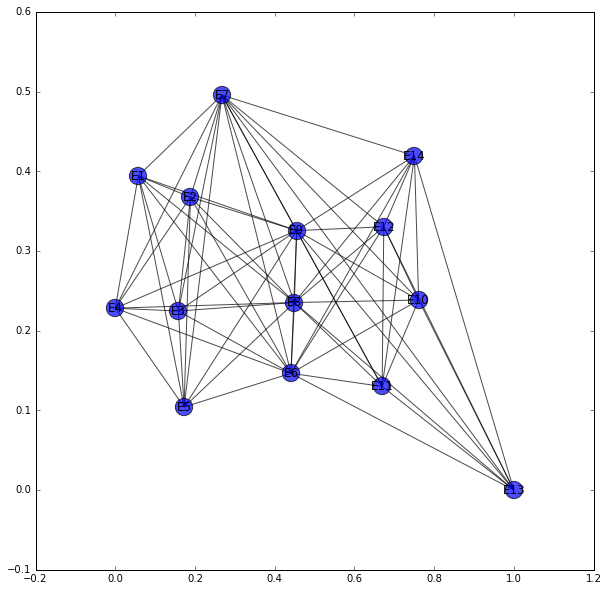

In [17]:
plt.figure(figsize=(10,10))
GD = bp.projected_graph(G, nodes_D) 
nx.draw_networkx(GD,node_color='blue',alpha=0.7)

Same here, the plot helps us understand what events (activities) are participated more and by the same women.